In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [8]:
dat = np.load("CalibrationHitPattern.npz")

Fit to HPK gain [e/OV]:  [735379.99731711]
Fit to CA:  [0.00883131]
Fit to PDE:  [-0.75464078  8.09907426  2.7334691 ]


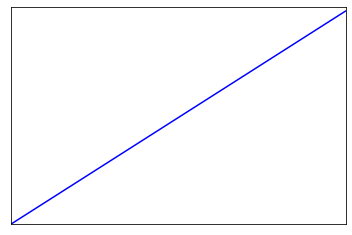

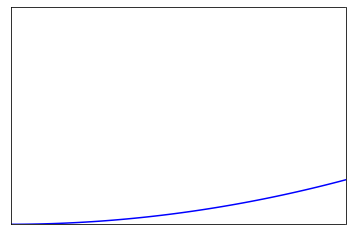

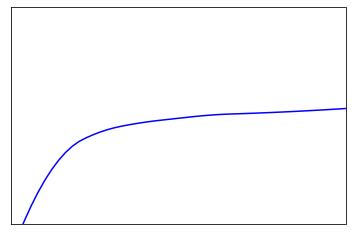

In [59]:
## fit the device parameters

def gain_fit(x,dg):
    return dg*x
    
def ca_fit(x,a):
    return a*x**2 


## gain vs ov
gdat = np.loadtxt('gain_vs_ov.txt', delimiter=',', skiprows=1)
gain_fit_vs_ov, bcov = curve_fit(gain_fit, gdat[:,0], gdat[:,1])
xx = np.linspace(0,8)
plt.figure()
#plt.plot(gdat[:,0], gdat[:,1], 'bo')
plt.plot(xx, gain_fit(xx, gain_fit_vs_ov), 'b')
plt.xlim(0,8)
plt.ylim(0, 6e6)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('gain_fit.png', transparent=True)
print("Fit to HPK gain [e/OV]: ", gain_fit_vs_ov)


## now the CA
cadat = np.loadtxt('ca_vs_ov.txt', delimiter=',', skiprows=1)
ca_fit_vs_ov, bcov = curve_fit(ca_fit, cadat[:,0], cadat[:,1])
xx = np.linspace(0,9)
plt.figure()
#plt.plot(cadat[:,0], cadat[:,1], 'bo')
plt.plot(xx, ca_fit(xx, *ca_fit_vs_ov), 'b')
plt.xlim(0,9)
plt.ylim(0, 3.5)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('ca_fit.png', transparent=True)
print("Fit to CA: ", ca_fit_vs_ov)

## now PDE
pdedat = np.loadtxt('pde_vs_ov.txt', delimiter=',', skiprows=1)
pde_fit = interp1d(pdedat[:,0], pdedat[:,1], fill_value="extrapolate", kind='quadratic')
xx = np.linspace(0,9)
plt.figure()
#plt.plot(pdedat[:,0], pdedat[:,1], 'bo')
plt.plot(xx, pde_fit(xx), 'b')
plt.xlim(0,9)
plt.ylim(5, 40)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.savefig('pde_fit.png', transparent=True)
print("Fit to PDE: ", pde_fit_vs_ov)

plt.show()

In [18]:
x = dat['X']
y = dat['Y']
hp = dat['HitPattern']
print(np.shape(x))
print(np.shape(y))
print(np.shape(hp))

(41, 193)
(41, 193)
(192, 40)


/var/folders/sz/h29lm_2j53v8vmw0zm_6hxqm0000gn/T/ipykernel_11383/976166191.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x[:-1,:-1],y[:-1,:-1],hp.T) #, vmin=0, vmax=100000)


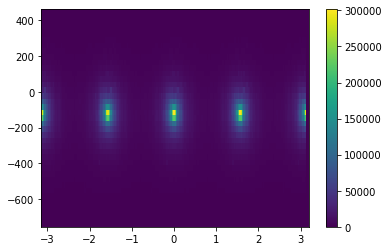

In [29]:
plt.pcolormesh(x[:-1,:-1],y[:-1,:-1],hp.T) #, vmin=0, vmax=100000)
plt.colorbar()
#plt.xlim(-0.1,0.1)
#plt.ylim(-200, -60)